In [46]:
#tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
#matplotlib inline

In [47]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [48]:
print(hist)

                high       low      open  volumefrom      volumeto     close  \
time                                                                           
2021-10-18  77859.95  74130.81  76310.52     5344.16  4.090249e+08  76986.11   
2021-10-19  79874.29  75657.81  76986.11     5157.34  3.998002e+08  79638.77   
2021-10-20  82699.14  78170.67  79638.77     5643.79  4.524044e+08  81043.53   
2021-10-21  82406.55  76363.84  81043.53     3559.59  2.821444e+08  76757.39   
2021-10-22  78858.33  74087.86  76757.39     4013.28  3.086047e+08  74766.56   
...              ...       ...       ...         ...           ...       ...   
2023-02-26  32198.13  31409.13  31542.40       48.99  1.554089e+06  32014.06   
2023-02-27  32414.07  31459.63  32014.06       73.08  2.329348e+06  31890.81   
2023-02-28  32083.25  31435.88  31890.81       77.81  2.475149e+06  31541.25   
2023-03-01  32832.70  31463.58  31541.25       98.50  3.163952e+06  32125.12   
2023-03-02  32315.95  31774.40  32125.12

In [49]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [50]:
hist

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-10-18,77859.95,74130.81,76310.52,5344.16,4.090249e+08,76986.11
2021-10-19,79874.29,75657.81,76986.11,5157.34,3.998002e+08,79638.77
2021-10-20,82699.14,78170.67,79638.77,5643.79,4.524044e+08,81043.53
2021-10-21,82406.55,76363.84,81043.53,3559.59,2.821444e+08,76757.39
2021-10-22,78858.33,74087.86,76757.39,4013.28,3.086047e+08,74766.56
...,...,...,...,...,...,...
2023-02-26,32198.13,31409.13,31542.40,48.99,1.554089e+06,32014.06
2023-02-27,32414.07,31459.63,32014.06,73.08,2.329348e+06,31890.81
2023-02-28,32083.25,31435.88,31890.81,77.81,2.475149e+06,31541.25


In [51]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [52]:
train, test = train_test_split(hist, test_size=0.2)

In [53]:
train

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-10-18,77859.95,74130.81,76310.52,5344.16,4.090249e+08,76986.11
2021-10-19,79874.29,75657.81,76986.11,5157.34,3.998002e+08,79638.77
2021-10-20,82699.14,78170.67,79638.77,5643.79,4.524044e+08,81043.53
2021-10-21,82406.55,76363.84,81043.53,3559.59,2.821444e+08,76757.39
2021-10-22,78858.33,74087.86,76757.39,4013.28,3.086047e+08,74766.56
...,...,...,...,...,...,...
2022-11-18,22578.23,22152.09,22220.64,98.91,2.205499e+06,22361.69
2022-11-19,22456.74,22164.64,22361.69,49.45,1.100415e+06,22315.57
2022-11-20,22368.64,21662.48,22315.57,63.44,1.400768e+06,21746.66


In [54]:
test

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2022-11-23,22396.66,21558.65,21614.95,170.08,3733691.23,22169.32
2022-11-24,22344.87,21743.92,22169.32,83.19,1840051.20,22136.58
2022-11-25,22398.31,21812.25,22136.58,90.33,1990866.59,22149.44
2022-11-26,22312.82,21975.93,22149.44,81.71,1811134.64,22059.92
2022-11-27,22225.88,22003.39,22059.92,57.25,1267819.54,22029.45
...,...,...,...,...,...,...
2023-02-26,32198.13,31409.13,31542.40,48.99,1554088.67,32014.06
2023-02-27,32414.07,31459.63,32014.06,73.08,2329348.39,31890.81
2023-02-28,32083.25,31435.88,31890.81,77.81,2475149.21,31541.25


In [55]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

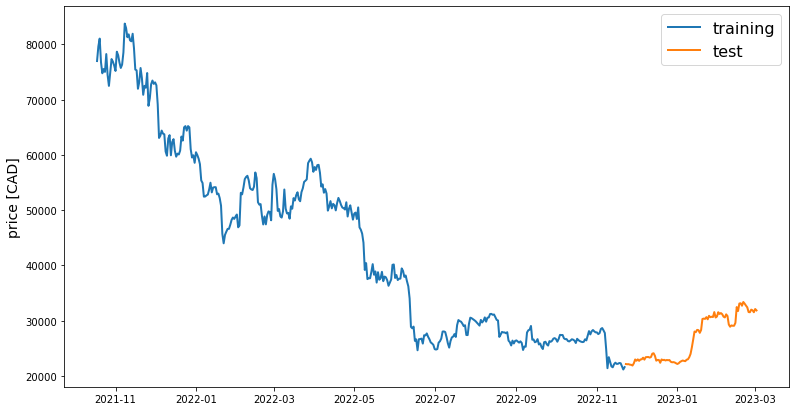

In [56]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')


In [57]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [58]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [59]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [60]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [61]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 200
epochs = 25
batch_size = 36
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [62]:
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [63]:
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
print(type(model))
print(type(history))
print(type(history.history))

Epoch 1/25
11/11 [==============================] - 4s 99ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 2/25
11/11 [==============================] - 0s 17ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 3/25
11/11 [==============================] - 0s 18ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 4/25
11/11 [==============================] - 0s 17ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 5/25
11/11 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 6/25
11/11 [==============================] - 0s 18ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/25
11/11 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 9.7899e-04
Epoch 8/25
11/11 [==============================] - 0s 21ms/step - loss: 0.0019 - val_loss: 8.0200e-04
Epoch 9/25
11/11 [==============================] - 0s 17ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 10/25
11/11 [==============================] - 0s 18ms/step - loss: 0.0020 - val_loss: 9.8058e-

In [64]:
print(history)

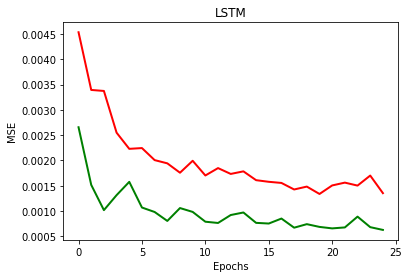

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [66]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)
print(type(targets))
print(type(preds))
mean_absolute_error(preds, y_test)

3/3 [==============================] - 1s 8ms/step
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


0.0164567625316665

In [67]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE

0.0006241331621091323

In [68]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.801411271044683

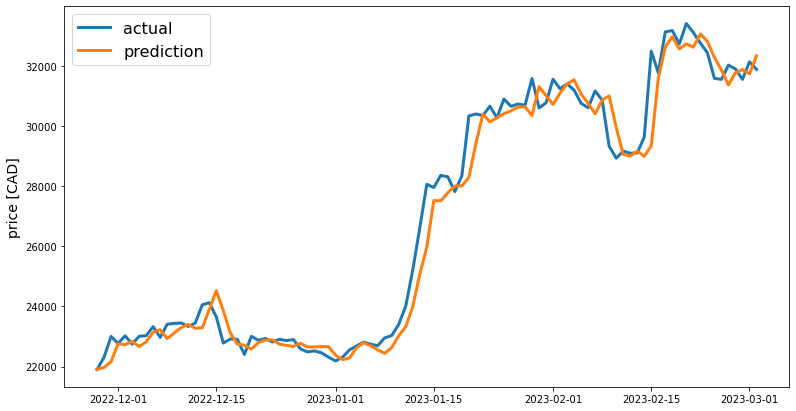

In [69]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)